In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

#### Loss function of Logistic Regression:

$$\sigma(t) = \frac{e^t}{1+e^t} = \frac{1}{1+e^{-t}}$$ 
And so that we have a new  negative log-likelihood function as our loss function:

$$l(\theta) = \frac{1}{m}\sum_{i=1}^m(-y_i\theta^Tx_i + ln(1+ e^{\theta^Tx_i})) $$


And this loss function is differentiable w.r.t $\theta$, if we apply first-order optimization techniques, such as **Gradient Descent, SGD**, we can easily get the results.

$$\frac{\partial l(\theta)}{\partial \theta} = - \sum_{i=1}^m x_i(y_i - p_1(x_i;\theta)) = \sum_{i=1}^m (\sigma(\theta^Tx_i) - y_i)x_i$$

And for the $j-th$ dimension, 
$$\frac{\partial l(\theta)}{\partial \theta_j} =  \sum_{i=1}^m (\sigma(\theta^Tx_i) - y_i)x_i^{(j)}$$
Where x already includes $1$ as for the intercept $b$



In [10]:
a = np.array([1,2,3])
b = np.array([1,2,3])
a@b

14

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def compute_cost(X, y, theta):
    
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    
    return cost

In [8]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [7]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

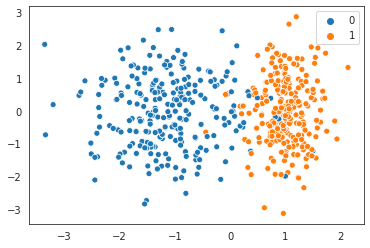

In [9]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



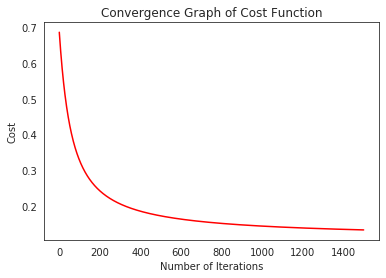

In [13]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [23]:
import pandas as pd
from textblob import Word
from textblob import TextBlob

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')

In [20]:
food_sets = wn.synsets('food')

food_stop_words = list()

for food_set in food_sets:
    food_stop_words += list(set([w.replace('_', ' ') for s in
                            food_set.closure(lambda s: s.hyponyms())
                            for w in s.lemma_names()]))

In [21]:
df = pd.read_json('review0.json', lines=True)
df.head(5)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,v0i_UHJMo_hPBq9bxWvW4w,bv2nCi5Qv5vroFiqKGopiw,0W4lkclzZThpx3V65bVgig,5,2016-05-28,"Love the staff, love the meat, love the place. Prepare for a long line around lunch or dinner hours. \n\nThey ask you how you want you meat, lean or something maybe, I can't remember. Just say you don't want it too fatty. \n\nGet a half sour pickle and a hot pepper. Hand cut french fries too.",0,0,0
1,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly.,0,0,0
2,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu every so often. Cool decor and vibe inside their 30 seat restaurant. Call for a reservation. \n\nWe had their beef tartar and pork belly to start and a salmon dish and lamb meal for mains. Everything was incredible! I could go on at length about how all the listed ingredients really make their dishes amazing but honestly you just need to go. \n\nA bit outside of downtown montreal but take the metro out and it's less than a 10 minute walk from the station.,0,0,0
3,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhood and has been there since 1951. They are known for smoked meat which most deli's have but their brisket sandwich is what I come to montreal for. They've got about 12 seats outside to go along with the inside. \n\nThe smoked meat is up there in quality and taste with Schwartz's and you'll find less tourists at Lester's as well.,0,0,0
4,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,"Love coming here. Yes the place always needs the floor swept but when you give out peanuts in the shell how won't it always be a bit dirty. \n\nThe food speaks for itself, so good. Burgers are made to order and the meat is put on the grill when you order your sandwich. Getting the small burger just means 1 patty, the regular is a 2 patty burger which is twice the deliciousness. \n\nGetting the Cajun fries adds a bit of spice to them and whatever size you order they always throw more fries (a lot more fries) into the bag.",0,0,0


In [28]:
col = ['stars', 'text']
cleaned_df = df[col]
cleaned_df = cleaned_df[pd.notnull(cleaned_df['text'])]
cleaned_df.columns = ['rating', 'review']

# Bin the reviews into 3 classes

cleaned_df['bin'] = pd.cut(cleaned_df['rating'], [0, 2, 4, float('inf'
                           )], labels=['1', '2', '3'])

# Set Dataframe to lower

cleaned_df['review'] = cleaned_df['review'].apply(lambda x: \
        ' '.join(x.lower() for x in x.split()))

# Remove symbols

cleaned_df['review'] = cleaned_df['review'].str.replace('[^\w\s]', '')

# Lemmatize

cleaned_df['review'] = cleaned_df['review'].apply(lambda x: \
        ' '.join([Word(word).lemmatize() for word in x.split()]))

# Add Sentiment column

cleaned_df['sentiment'] = cleaned_df['review'].apply(lambda x: \
        TextBlob(x).sentiment[0])

# Remove stop words

cleaned_df['review'] = cleaned_df['review'].apply(lambda x: ' '.join(x
        for x in x.split() if x not in stop))
cleaned_df['review'] = cleaned_df['review'].apply(lambda x: ' '.join(x
        for x in x.split() if x not in food_stop_words))

In [29]:
cleaned_df.head(5)

,rating,review,bin,sentiment
0,5,love staff love love place prepare long line around hour ask want lean something maybe cant remember say dont want fatty get half hot hand french fry,3,0.131481
1,5,super simple place amazing nonetheless around since 30 still serve thing started staff wa helpful friendly,3,0.251389
2,5,small unassuming place change every often cool decor vibe inside 30 seat restaurant call reservation tartar belly start main everything wa incredible could go length listed really make amazing honestly need go bit outside downtown montreal take metro le 10 minute walk station,3,0.320833
3,5,lesters located beautiful neighborhood ha since 1951 known smoked deli come montreal theyve got 12 seat outside go along inside smoked quality taste schwartzs youll find le tourist lesters well,3,0.450000
4,4,love coming yes place always need floor swept give peanut shell wont always bit dirty food speaks good made order put grill order getting small mean 1 regular 2 twice deliciousness getting cajun fry add bit whatever size order always throw fry lot fry bag,2,0.129688


In [30]:
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5,
    norm='l2',
    encoding='latin-1',
    ngram_range=(1, 2),
    stop_words=food_stop_words,
    )

# Convert the reviews to tf-idf features

features = tfidf.fit_transform(cleaned_df.review)

# Obtain the class labels 'bin'

labels = cleaned_df.bin

# Add column for sentiment

features = hstack((features, np.array(cleaned_df['sentiment'])[:,
                  None]))

# Print the shape (row, columns)

print (features.shape)

/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['a1', 'a2', 'acid', 'acidophilus', 'acorn', 'adams', 'afternoon', 'agneau', 'alaska', 'alaskan', 'albert', 'alcoholic', 'alfredo', 'alimentary', 'all', 'allergy', 'alligator', 'almond', 'alpha', 'alphabet', 'altar', 'american', 'amontillado', 'anadama', 'and', 'anemia', 'angel', 'anglais', 'antiberiberi', 'antihemorrhagic', 'antiophthalmic', 'antipernicious', 'aqua', 'ardent', 'armagnac', 'armerican', 'arroz', 'ascorbic', 'ash', 'atlantic', 'au', 'b1', 'b12', 'b2', 'b6', 'bag', 'baked', 'baking', 'balanced', 'baldwin', 'ball', 'balm', 'bamboo', 'bar', 'barbados', 'barbecued', 'bathtub', 'bavarian', 'bay', 'bc', 'beach', 'beans', 'bear', 'beaujolais', 'beauty', 'belgian', 'bell', 'belly', 'beluga', 'benedict', 'bercy', 'berlin', 'bermuda', 'berries', 'betty', 'beurre', 'bibb', 'bin

(5000, 11796)


In [31]:
# Bagged LR for Classification
seed = 7
kfold = model_selection.KFold(n_splits=20, random_state=seed)
cart = LogisticRegression()
num_trees = 5
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, features, labels, cv=kfold)
print(results.mean())

/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/rw2694/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERA

0.6864000000000001


In [32]:
model.fit(features,labels)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=5, n_jobs=None, oob_score=False,
                  random_state=7, ver

In [ ]:
input_text = input("Enter Review: ")
input_text = [input_text]
input_text = pd.DataFrame(input_text, columns=['a'])

# Set Dataframe to lower 
input_text['a'] = input_text['a'].str.lower()

# # Remove symbols
input_text['a'] = input_text['a'].str.replace('[^\w\s]','')

# # Lemmatize 
# cleaned_df['a'] = cleaned_df['a'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# # Add Sentiment column
input_text['sentiment'] = input_text['a'].apply(lambda x: TextBlob(x).sentiment[0] )


input_transform = tfidf.transform(input_text['a'])
input_transform = hstack((input_transform, np.array(input_text['sentiment'])[:,
                  None]))



print(model.predict(input_transform)[0])